#**Project Description**

**The objective of this project is to apply supervised machine learning techniques on the classic Iris dataset to classify flowers into three species: *Setosa, Versicolor, and Virginica*.**
**The project involves data preprocessing, training and evaluating multiple classification algorithms, and selecting the most accurate model.**  
**The final outcome is a saved model that can be reused for reliable predictions.**


**Libraries**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import joblib

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


**The Iris Dataset**

In [2]:
df = pd.read_csv('/content/Iris.csv')

# Display the first 5 rows of the Data
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.shape

(150, 6)

In [5]:
# Summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [6]:
df.describe(include="object").T


,count,unique,top,freq
Species,150,3,Iris-setosa,50


**Data Cleaning**

In [7]:
df.isnull().sum()




,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df = df.drop(columns=['Id'])


**EDA**



In [10]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


/tmp/ipython-input-4146135033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Species', palette='viridis')


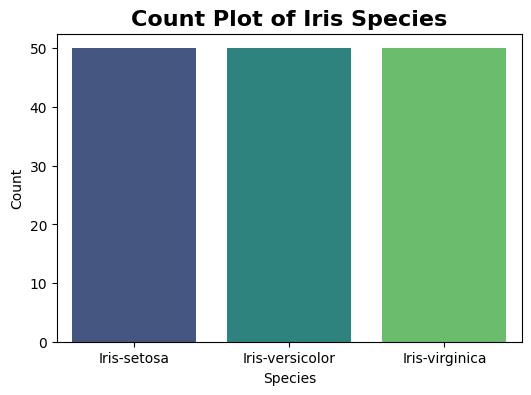

In [11]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Species', palette='viridis')
ax.set_title('Count Plot of Iris Species', fontsize=16, fontweight='bold')
ax.set_xlabel('Species')
ax.set_ylabel('Count')

plt.show()


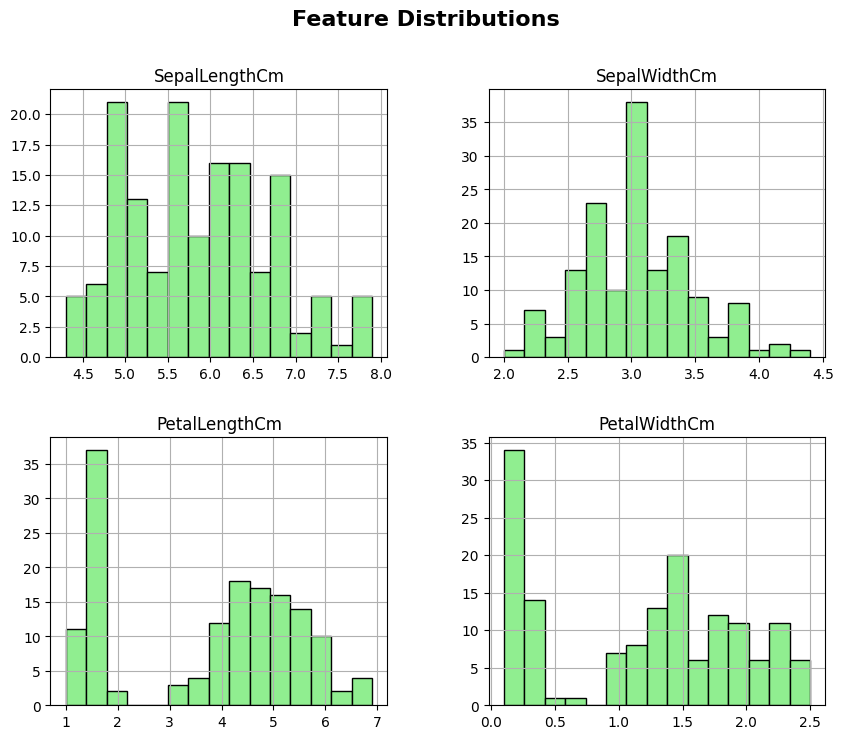

In [12]:
df.hist(figsize=(10,8), color='lightgreen', edgecolor='black', bins=15)
plt.suptitle("Feature Distributions", fontsize=16, fontweight='bold')
plt.show()


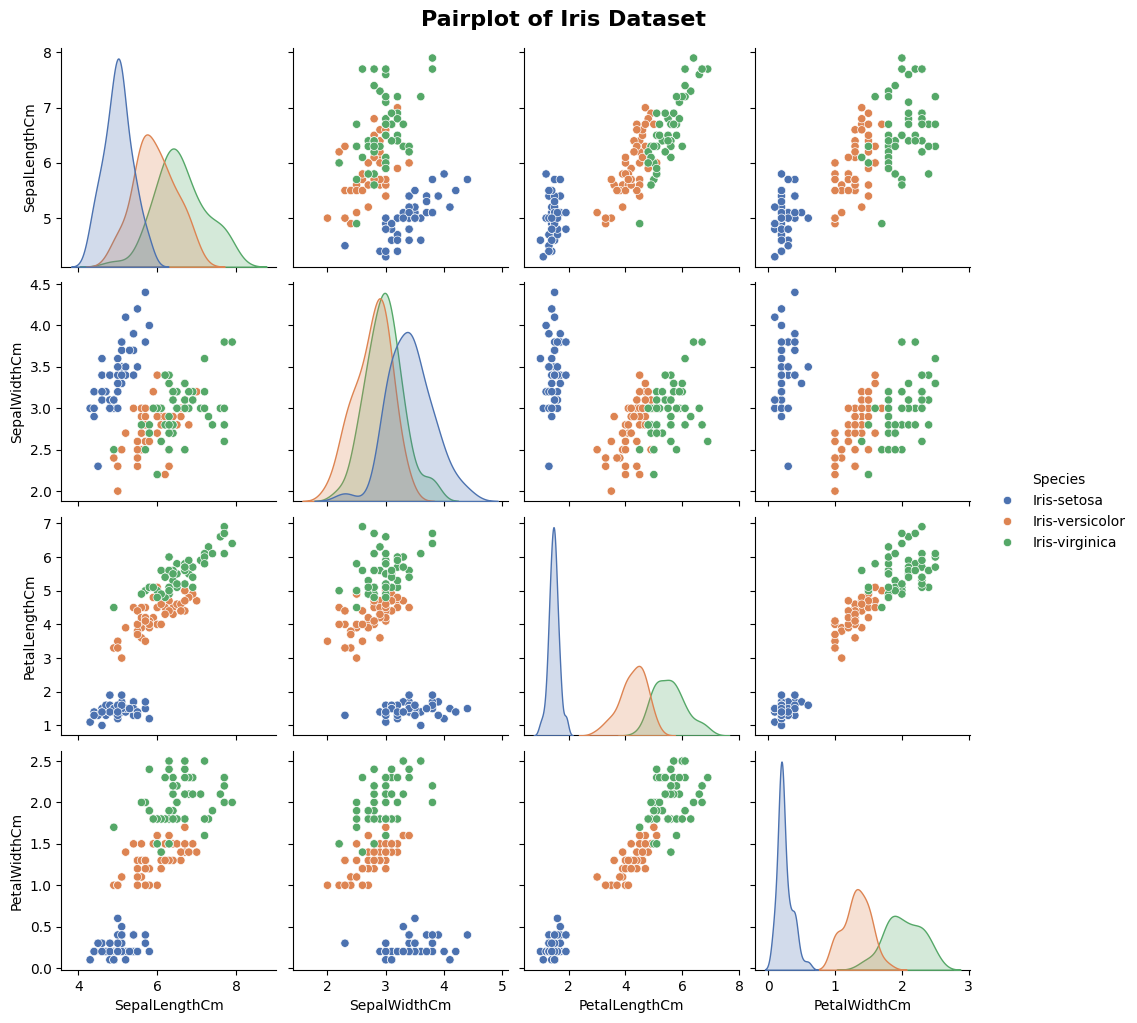

In [13]:
sns.pairplot(df, hue='Species', palette='deep')
plt.suptitle('Pairplot of Iris Dataset', y=1.02, fontsize=16, fontweight='bold')
plt.show()

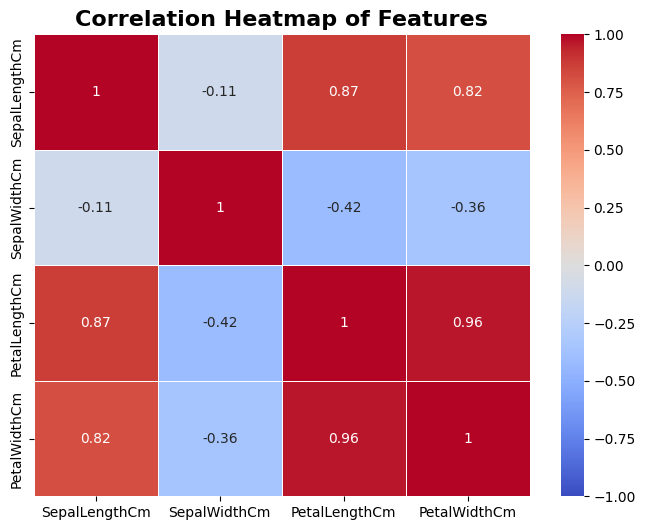

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)    # drop Species(object) from Hearmap(For Number Columns)
plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold')
plt.show()

**Outliers**

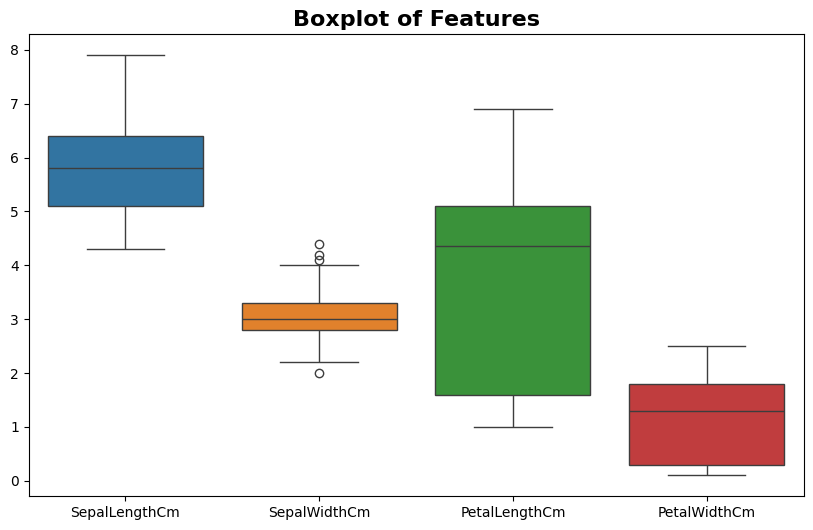

,0
SepalLengthCm,0
SepalWidthCm,4
PetalLengthCm,0
PetalWidthCm,0


In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop(columns=["Species"]))
plt.title("Boxplot of Features", fontsize=16, fontweight='bold')
plt.show()

Q1 = df.drop(columns=['Species']).quantile(0.25)
Q3 = df.drop(columns=['Species']).quantile(0.75)
IQR = Q3 - Q1

outliers = ((df.drop(columns=['Species']) < (Q1 - 1.5 * IQR)) |
            (df.drop(columns=['Species']) > (Q3 + 1.5 * IQR)))

outliers.sum()


**Step5. Encoding Categorical Data**

In [16]:

encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Train-Test Split**

In [17]:
X = df.drop(columns=['Species'],axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


**Modeling**

In [18]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.2f}")

Logistic Regression: 0.97
KNN: 1.00
Decision Tree: 0.93
Random Forest: 0.90
SVM: 0.97
Naive Bayes: 0.97


**Models Evaluation**

In [19]:
# Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("="*40)
    print(f"📌 Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))

📌 Model: Logistic Regression
Accuracy: 0.97
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

📌 Model: KNN
Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

📌 Model: Dec

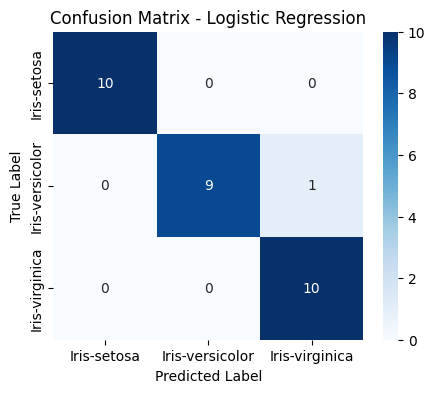

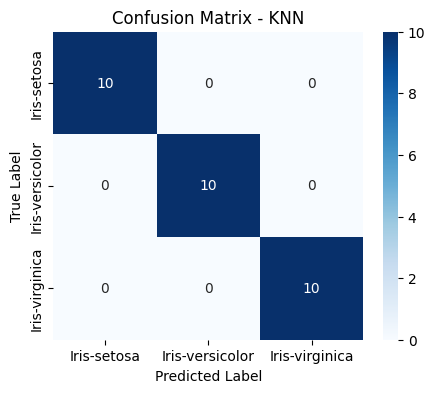

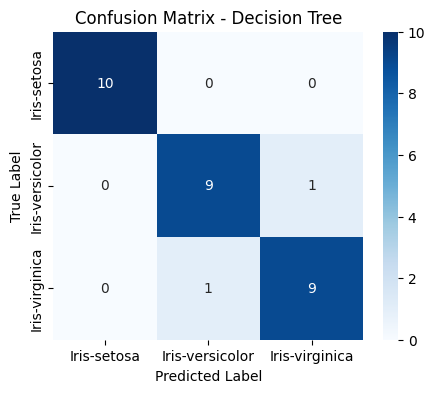

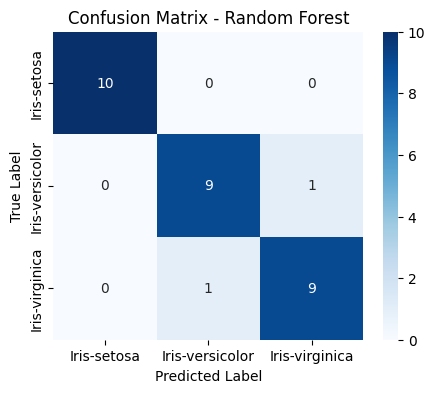

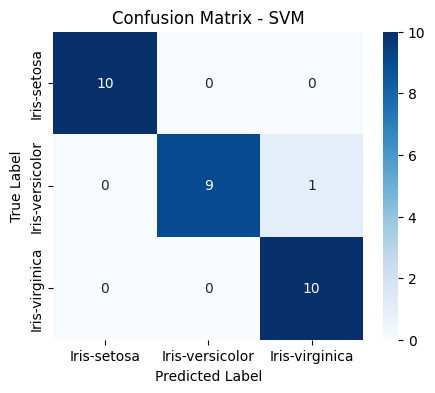

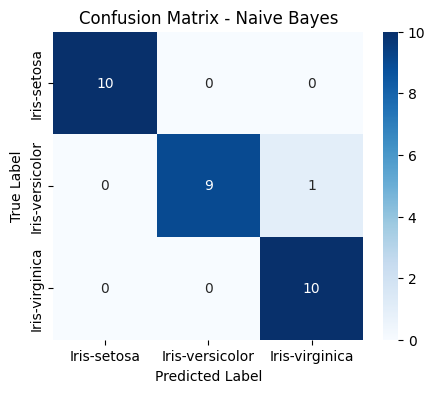

In [20]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=encoder.classes_,
                yticklabels=encoder.classes_)

    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


**Save model**

In [21]:
best_model = None
best_score = 0
best_name = ""
for name, model in models.items():
    model.fit(X_train, y_train)
    score = accuracy_score(y_test, model.predict(X_test))

    if score > best_score:
        best_score = score
        best_model = model
        best_name = name

filename = f"{best_name.replace(' ', '_')}.pkl"
joblib.dump(best_model, filename)

print(f"✅ Best Model: {best_name} with Accuracy {best_score:.2f}")
print(f"✅ Saved as: {filename}")


✅ Best Model: KNN with Accuracy 1.00
✅ Saved as: KNN.pkl
